- 用いた機械学習モデル同士の関係性をネットワーク構造で調べる
- cos類似度を用いて判断する

- ※cos類似度を計算する時は，各評価指標値内で標準化してから行う

| コサイン類似度     | 解釈              |
| ----------- | --------------- |
| **1.0**     | 完全に同じ方向（≒同じ傾向）  |
| **0.7～0.9** | よく似ている          |
| **0.5～0.7** | ある程度似ている        |
| **0.0**     | 無相関（直角、全く異なる傾向） |
| **-1.0**    | 完全に反対方向（正反対の傾向） |


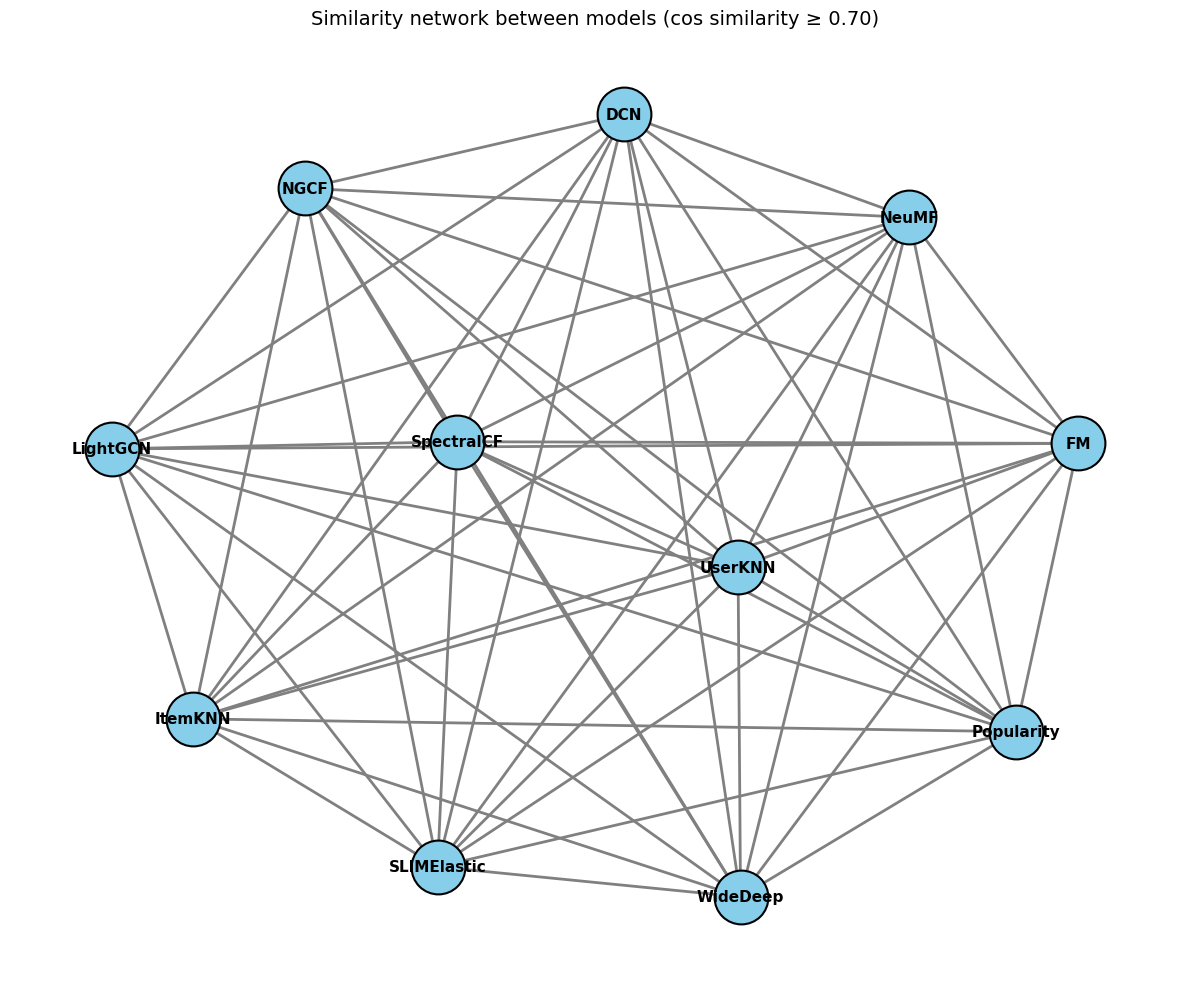

In [17]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # 0:all, 1:filter INFO, 2:filter WARNING, 3:only ERROR

# モデルの評価指標（例：RecBoleや自作コードで得た値を入力）
# [Recall@10, Precision@10, NDCG@10, MRR@10, Hit@10]
model_metrics = {
    "DCN":         [0.0043, 0.0004, 0.0025, 0.0020, 0.0043],
    "FM":          [0.2391, 0.0239, 0.1260, 0.0921, 0.2391],
    "ItemKNN":     [0.1177, 0.0118, 0.0614, 0.0445, 0.1177],
    "LightGCN":    [0.0043, 0.0004, 0.0015, 0.0007, 0.0043],
    "NeuMF":       [0.0202, 0.0020, 0.0113, 0.0086, 0.0202],
    "NGCF":        [0.0308, 0.0031, 0.0157, 0.0113, 0.0308],
    "Popularity":  [0.0498, 0.0050, 0.0241, 0.0165, 0.0498],
    "SLIMElastic": [0.0978, 0.0098, 0.0555, 0.0425, 0.0978],
    "SpectralCF":  [0.0032, 0.0003, 0.0015, 0.0010, 0.0032],
    "UserKNN":     [0.1283, 0.0128, 0.0649, 0.0456, 0.1283],
    "WideDeep":    [0.1413, 0.0141, 0.0706, 0.0492, 0.1413],
}

# 類似度計算
models = list(model_metrics.keys())
vectors = np.array(list(model_metrics.values()))
similarity_matrix = cosine_similarity(vectors)

# グラフ構築
G = nx.Graph()
for model in models:
    G.add_node(model)

for i, j in combinations(range(len(models)), 2):
    sim = similarity_matrix[i][j]
    if sim >= 0.70:  # 類似度しきい値
        G.add_edge(models[i], models[j], weight=sim)

# spring layoutで配置
pos = nx.spring_layout(G, k=0.6, iterations=50, seed=42)

# 描画
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=1500, edgecolors="black", linewidths=1.5)
nx.draw_networkx_labels(G, pos, font_size=11, font_weight="bold")

# エッジは一定の太さに固定
nx.draw_networkx_edges(G, pos, width=2, edge_color='gray')

plt.title("Similarity network between models (cos similarity ≥ 0.70)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

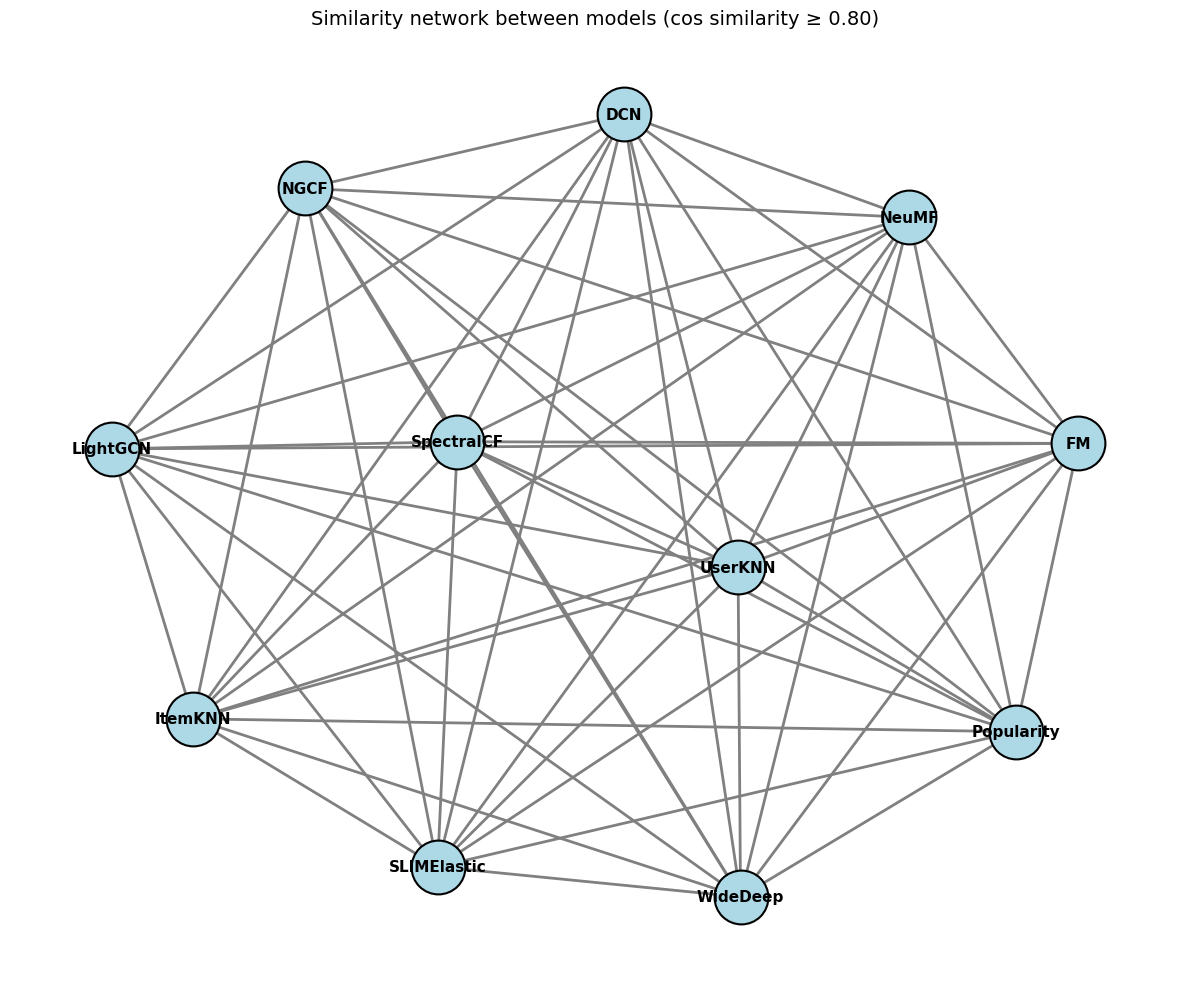

In [18]:
# モデルとベクトル抽出
models = list(model_metrics.keys())
vectors = np.array(list(model_metrics.values()))
similarity_matrix = cosine_similarity(vectors)

# 類似度0.80以上のエッジを作成
G = nx.Graph()
for model in models:
    G.add_node(model)

for i, j in combinations(range(len(models)), 2):
    sim = similarity_matrix[i][j]
    if sim >= 0.80:
        G.add_edge(models[i], models[j], weight=sim)

# springレイアウト
pos = nx.spring_layout(G, k=0.6, iterations=50, seed=42)

# 描画
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=1500, edgecolors="black", linewidths=1.5)
nx.draw_networkx_labels(G, pos, font_size=11, font_weight="bold")

# エッジは一定の太さに固定
nx.draw_networkx_edges(G, pos, width=2, edge_color='gray')

plt.title("Similarity network between models (cos similarity ≥ 0.80)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()

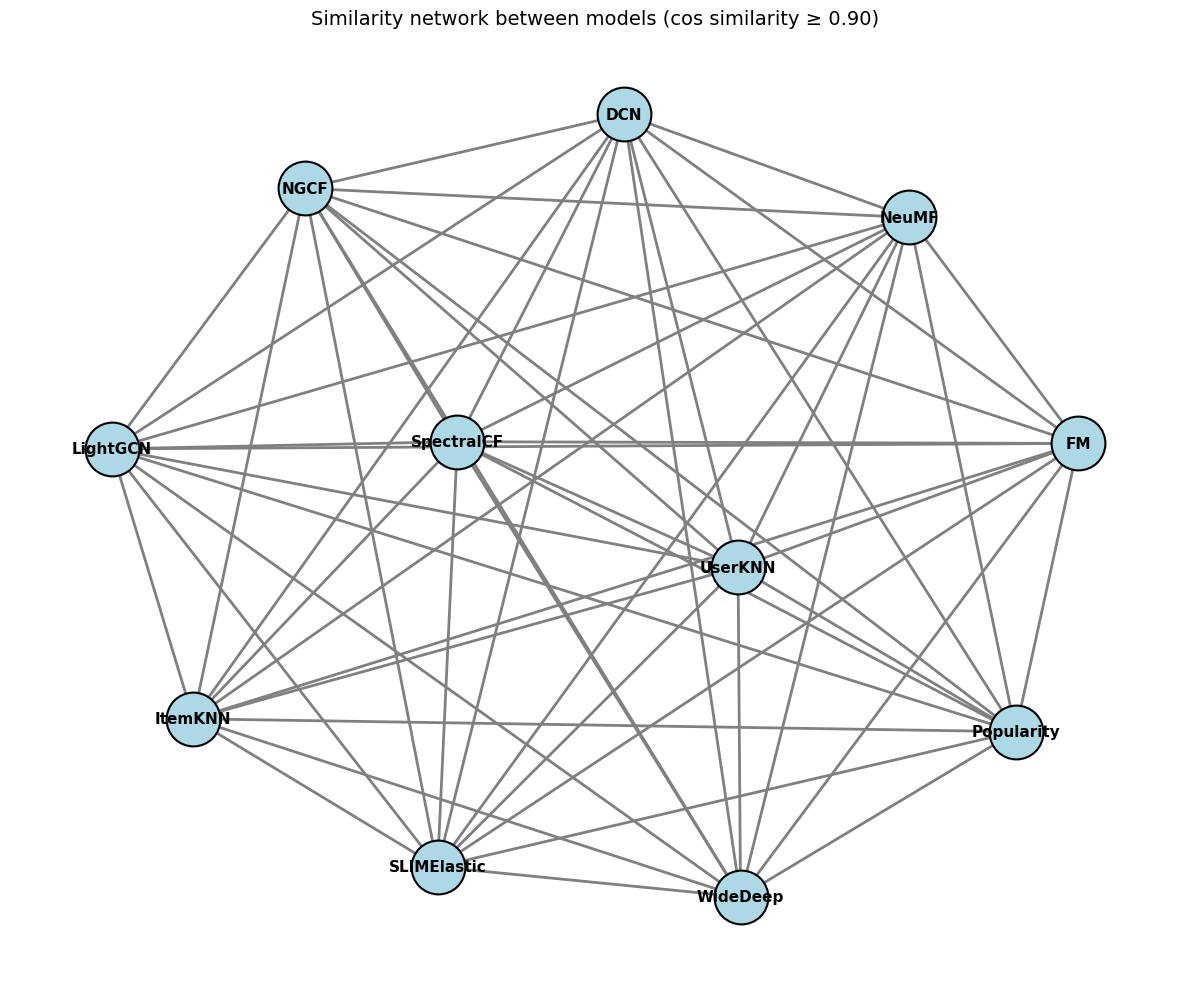

In [20]:
# モデルとベクトル抽出
models = list(model_metrics.keys())
vectors = np.array(list(model_metrics.values()))
similarity_matrix = cosine_similarity(vectors)

# 類似度0.90以上のエッジを作成
G = nx.Graph()
for model in models:
    G.add_node(model)

for i, j in combinations(range(len(models)), 2):
    sim = similarity_matrix[i][j]
    if sim >= 0.90:
        G.add_edge(models[i], models[j], weight=sim)

# springレイアウト
pos = nx.spring_layout(G, k=0.6, iterations=50, seed=42)

# 描画
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=1500, edgecolors="black", linewidths=1.5)
nx.draw_networkx_labels(G, pos, font_size=11, font_weight="bold")

# エッジは一定の太さに固定
nx.draw_networkx_edges(G, pos, width=2, edge_color='gray')

plt.title("Similarity network between models (cos similarity ≥ 0.90)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()

In [7]:
# cos類似度を高く設定してもネットワーク構造への変化が小さい理由→各評価指標値の中で大きい値がある場合は計算値への影響が大きいため

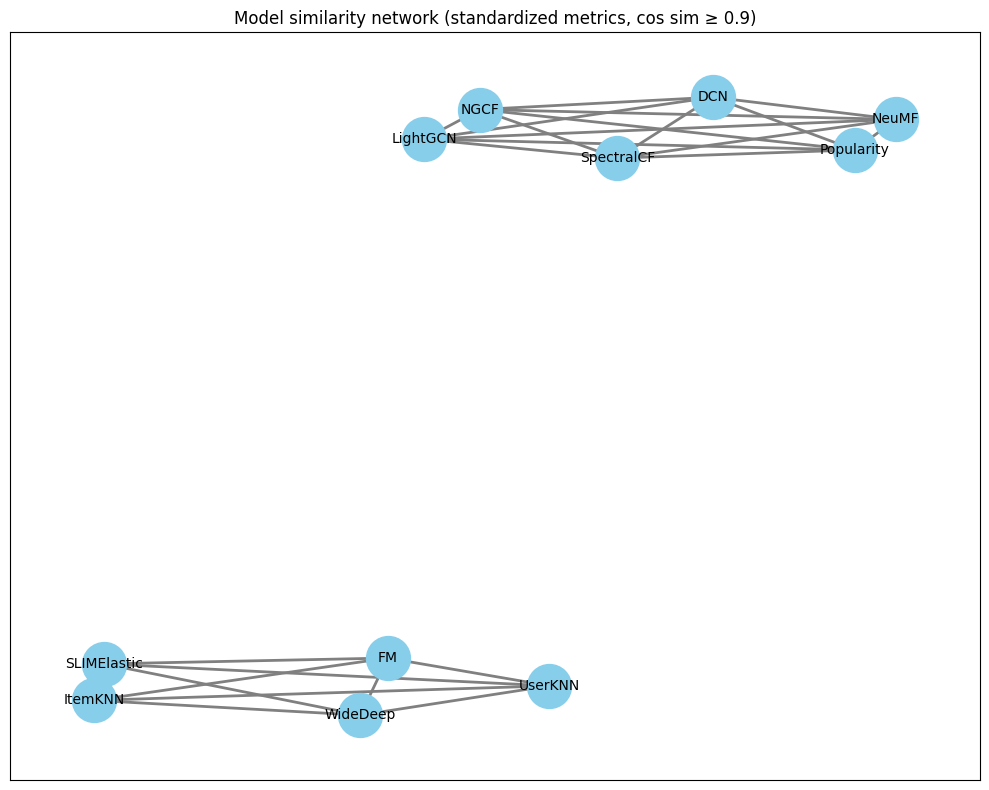

In [15]:
# 方向は標準化しても変わらないはずだが確かめるために計算する．

from sklearn.preprocessing import StandardScaler

# モデル名と行列化
models = list(model_metrics.keys())
values = np.array(list(model_metrics.values()))

# Z-score標準化
scaler = StandardScaler()
values_scaled = scaler.fit_transform(values)

# コサイン類似度の計算
similarity_matrix = cosine_similarity(values_scaled)

# ネットワーク構築（しきい値0.9以上）
threshold = 0.9
G = nx.Graph()
for model in models:
    G.add_node(model)

for i, j in combinations(range(len(models)), 2):
    sim = similarity_matrix[i][j]
    if sim >= threshold:
        G.add_edge(models[i], models[j], weight=sim)

# spring layoutで描画
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1000)
nx.draw_networkx_labels(G, pos, font_size=10)

# エッジは一定の太さに固定
nx.draw_networkx_edges(G, pos, width=2, edge_color='gray')

plt.title("Model similarity network (standardized metrics, cos sim ≥ 0.9)")
plt.tight_layout()
plt.show()

In [10]:
# 各評価指標値を標準化することにより，各評価指標値同士間のスケールが調整されるため，ネットワーク構造が変化する．
# 評価指標値内で大きな値がある場合は，その値にcos類似度は引っ張られるため，標準化してからcos類似度を計算するべきである．

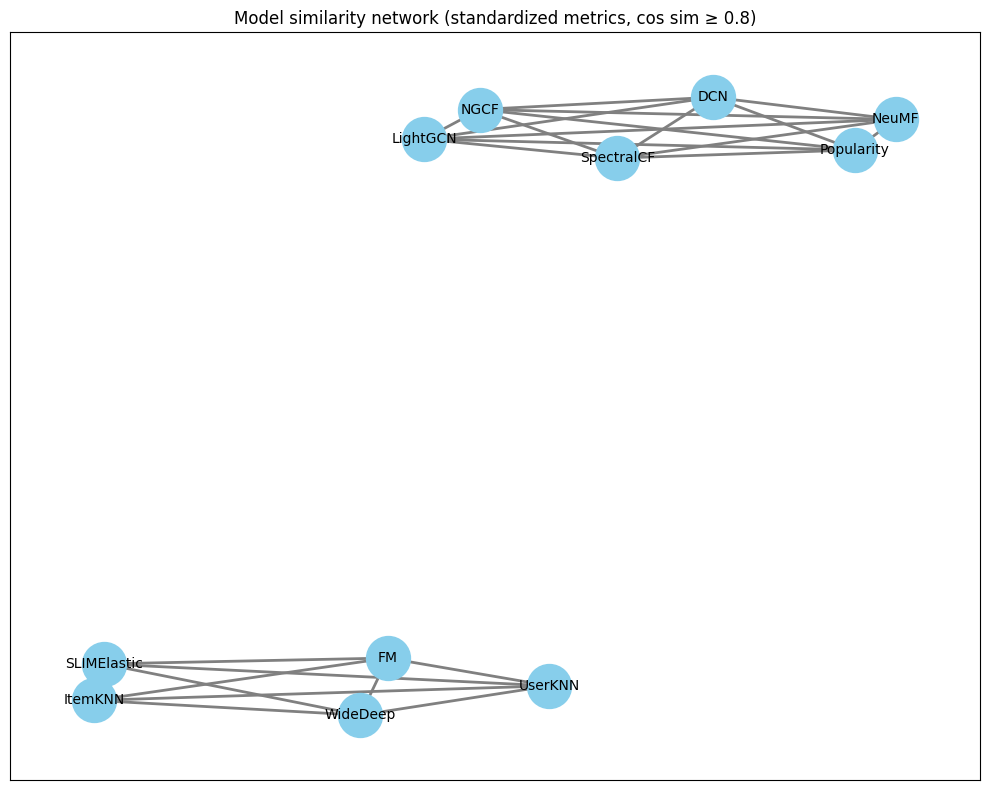

In [21]:
# 方向は標準化しても変わらないはずだが確かめるために計算する．

from sklearn.preprocessing import StandardScaler

# モデル名と行列化
models = list(model_metrics.keys())
values = np.array(list(model_metrics.values()))

# Z-score標準化
scaler = StandardScaler()
values_scaled = scaler.fit_transform(values)

# コサイン類似度の計算
similarity_matrix = cosine_similarity(values_scaled)

# ネットワーク構築（しきい値0.8以上）
threshold = 0.8
G = nx.Graph()
for model in models:
    G.add_node(model)

for i, j in combinations(range(len(models)), 2):
    sim = similarity_matrix[i][j]
    if sim >= threshold:
        G.add_edge(models[i], models[j], weight=sim)

# spring layoutで描画
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1000)
nx.draw_networkx_labels(G, pos, font_size=10)

# エッジは一定の太さに固定
nx.draw_networkx_edges(G, pos, width=2, edge_color='gray')

plt.title("Model similarity network (standardized metrics, cos sim ≥ 0.8)")
plt.tight_layout()
plt.show()

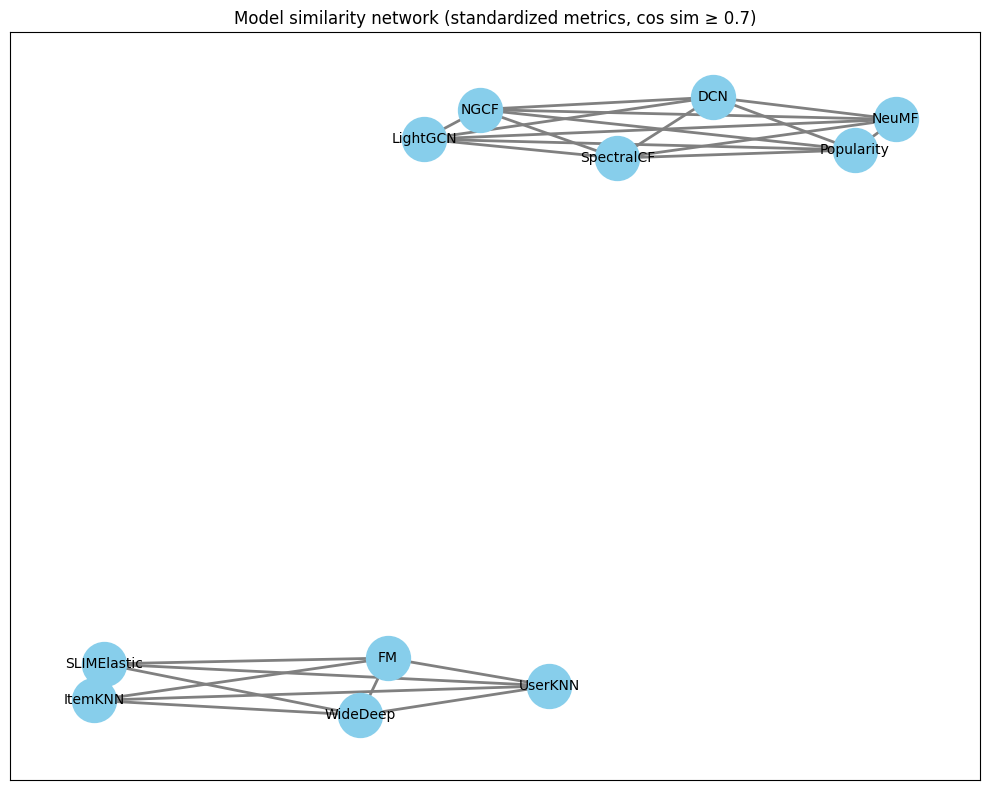

In [22]:
# 方向は標準化しても変わらないはずだが確かめるために計算する．

from sklearn.preprocessing import StandardScaler

# モデル名と行列化
models = list(model_metrics.keys())
values = np.array(list(model_metrics.values()))

# Z-score標準化
scaler = StandardScaler()
values_scaled = scaler.fit_transform(values)

# コサイン類似度の計算
similarity_matrix = cosine_similarity(values_scaled)

# ネットワーク構築（しきい値0.7以上）
threshold = 0.7
G = nx.Graph()
for model in models:
    G.add_node(model)

for i, j in combinations(range(len(models)), 2):
    sim = similarity_matrix[i][j]
    if sim >= threshold:
        G.add_edge(models[i], models[j], weight=sim)

# spring layoutで描画
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1000)
nx.draw_networkx_labels(G, pos, font_size=10)

# エッジは一定の太さに固定
nx.draw_networkx_edges(G, pos, width=2, edge_color='gray')

plt.title("Model similarity network (standardized metrics, cos sim ≥ 0.7)")
plt.tight_layout()
plt.show()

In [ ]:
# cos類似度の値を変化させてもノード間のエッジは変化しない．